***
## [torch.nn](https://pytorch.org/docs/stable/nn.html)
nn是神经网络Neural Network的简写，这个库里集成了pytorch的神经网络相关的算法和模型。
***
### Containers
Containers是pytorch中的神经网络模型的容器。
|类|简介|
|---|---|
|Module|所有神经网络模块的基类|
|Sequential|顺序存储容器|
|ModuleList|子模块列表|
|ModuleDict|子模块字典|
|ParameterList|参数列表|
|ParameterDict|参数字典|

其中Module类最常使用。
#### [Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module)
Module是所有神经网络模块的基类，我们的模型都需要继承它，并且重写其中的__init__和forward等方法。

In [2]:
from torch import nn
import torch

class MyModule(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, input):
        output = input + 1
        return output

md = MyModule()
x = torch.tensor(1.)
y = md.forward(x)
print(y)

tensor(2.)


### Convolution Layers 卷积层
Convolution Layers为torch中提供的卷积层模型。
|类|简介|
|---|---|
|nn.Conv2d|对输入进行一维卷积|
|nn.Conv2d|对输入进行二维卷积|
|nn.Conv3d|对输入进行三维卷积|
|nn.ConvTranspose1d|一维转置卷积|
|nn.ConvTranspose2d|二维转置卷积|
|nn.ConvTranspose3d|三维转置卷积|
|nn.LazyConv2d|省略输入参数的Conv1d|
|nn.LazyConv2d|省略输入参数的Conv2d|
|nn.LazyConv3d|省略输入参数的Conv3d|
|nn.LazyConvTranspose1d|省略in_channel的ConvTranspose1d|
|nn.LazyConvTranspose2d|省略in_channel的ConvTranspose2d|
|nn.LazyConvTranspose3d|省略in_channel的ConvTranspose3d|
|nn.Unfold|滑动窗口提取|
|nn.Fold|逆滑动窗口提取|

其中nn.Conv2d常用于图像识别中。
```python
torch.nn.Conv1d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)

torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)

torch.nn.Conv3d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)

torch.nn.ConvTranspose1d(in_channels, out_channels, kernel_size, stride=1, padding=0, output_padding=0, groups=1, bias=True, dilation=1, padding_mode='zeros', device=None, dtype=None)

torch.nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride=1, padding=0, output_padding=0, groups=1, bias=True, dilation=1, padding_mode='zeros', device=None, dtype=None)

torch.nn.ConvTranspose3d(in_channels, out_channels, kernel_size, stride=1, padding=0, output_padding=0, groups=1, bias=True, dilation=1, padding_mode='zeros', device=None, dtype=None)
```
**Parameters**
* in_channels   - 输入通道数
* out_channels  - 卷积产生的通道数
* kernel_size   - 卷积核大小，int或者tuple
* stride        - 卷积步长，可选int或者tuple
* padding       - 填充数目，可选int或者tuple
* padding_mode  - 填充模式，可选'zeros', 'reflect', 'replicate' or 'circular'
* dilation      - 卷积核点间隔，可选int或者tuple
* groups        - 控制分组卷积
* bias          - 控制是否有偏差参数，bool

#### [卷积层参数演示动画](https://github.com/vdumoulin/conv_arithmetic)
#### [卷积原理讲解推荐](https://www.bilibili.com/video/BV1Vd4y1e7pj/)


In [3]:
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

dataset = torchvision.datasets.CIFAR10("./data", train=False, transform=torchvision.transforms.ToTensor(), download=True)
dataloader = DataLoader(dataset, batch_size=64)

class MyConv(nn.Module):
    def __init__(self):
        super(MyConv, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3)

    def forward(self, x):
        x = self.conv1(x)
        return x

myConv = MyConv()
writer = SummaryWriter("./logs")
step = 0
for data in dataloader:
    img, target = data
    output = myConv(img)
    if(step == 0):
        print(img.shape)
        print(output.shape)
    writer.add_images("conv_input", img, step)
    writer.add_images("conv_output", output, step)
    step += 1


Files already downloaded and verified
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 30, 30])


In [19]:
# 一维卷积
import torch
from torch import nn

tensor1d = torch.rand(1,8)
print(tensor1d)

# 卷积
conv1d1 = nn.Conv1d(1, 1, 3, 1, 0)
output1 = conv1d1(tensor1d)
print(output1)

# stride = kernel_size
conv1d2 = nn.Conv1d(1, 1, 3, stride=3)
output2 = conv1d2(tensor1d)
print(output2)

# padding = 1
conv1d3 = nn.Conv1d(1, 1, 3, padding=1)
output3 = conv1d3(tensor1d)
print(output3)

# dilation = 1
conv1d4 = nn.Conv1d(1, 1, 3, dilation=1)
output4 = conv1d4(tensor1d)
print(output4)

tensor([[0.3403, 0.0917, 0.2900, 0.6064, 0.0891, 0.6702, 0.0056, 0.4279]])
tensor([[0.5049, 0.2209, 0.3136, 0.5080, 0.2250, 0.6419]],
       grad_fn=<SqueezeBackward1>)
tensor([[0.4106, 0.3210]], grad_fn=<SqueezeBackward1>)
tensor([[0.3633, 0.6048, 0.6120, 0.2791, 0.7993, 0.1884, 0.7456, 0.2858]],
       grad_fn=<SqueezeBackward1>)
tensor([[-0.3567, -0.2794, -0.2921, -0.5562, -0.1746, -0.5497]],
       grad_fn=<SqueezeBackward1>)


In [21]:
# 一维反卷积
import torch
from torch import nn

tensor1d = torch.rand(1,8)
print(tensor1d)

# 反卷积
conv1d1 = nn.Conv1d(1, 1, 3, 1, 0)
output1 = conv1d1(tensor1d)
tconv1d1 = nn.ConvTranspose1d(1, 1, 3, 1, 0)
toutput1 = tconv1d1(output1)
print(toutput1)

# stride = kernel_size
tconv1d2 = nn.ConvTranspose1d(1, 1, 3, stride=3)
toutput2 = tconv1d2(tensor1d)
print(toutput2)

# padding = 1
tconv1d3 = nn.ConvTranspose1d(1, 1, 3, padding=1)
toutput3 = tconv1d3(tensor1d)
print(toutput3)

# dilation = 1
tconv1d4 = nn.ConvTranspose1d(1, 1, 3, dilation=1)
toutput4 = tconv1d4(tensor1d)
print(toutput4)

tensor([[0.3317, 0.9029, 0.9095, 0.2939, 0.7692, 0.6878, 0.5697, 0.8918]])
tensor([[-0.6762, -0.5518, -0.7697, -0.8440, -0.8553, -0.7672, -0.6713, -0.8288]],
       grad_fn=<SqueezeBackward1>)
tensor([[ 0.3114,  0.2088,  0.0365,  0.5302,  0.2508, -0.2182,  0.5327,  0.2513,
         -0.2211,  0.2969,  0.2060,  0.0533,  0.4789,  0.2409, -0.1585,  0.4478,
          0.2350, -0.1223,  0.4025,  0.2263, -0.0696,  0.5259,  0.2500, -0.2132]],
       grad_fn=<SqueezeBackward1>)
tensor([[0.4983, 0.5072, 0.1729, 0.4240, 0.3858, 0.3202, 0.4936, 0.0141]],
       grad_fn=<SqueezeBackward1>)
tensor([[ 0.2368,  0.0662, -0.0983, -0.1351, -0.1930, -0.0193, -0.1371, -0.1774,
          0.0461,  0.0276]], grad_fn=<SqueezeBackward1>)


In [28]:
# 二维卷积
import torch
from torch import nn

tensor2d = torch.rand(1,5,5)
print(tensor2d)

# 卷积
conv2d1 = nn.Conv2d(1, 1, 3, 1, 0)
output1 = conv2d1(tensor2d)
print(output1)

# stride = kernel_size
conv2d2 = nn.Conv2d(1, 1, 3, stride=3)
output2 = conv2d2(tensor2d)
print(output2)

# padding = 1
conv2d3 = nn.Conv2d(1, 1, 3, padding=1)
output3 = conv2d3(tensor2d)
print(output3)

# dilation = 1
conv2d4 = nn.Conv2d(1, 1, 3, dilation=1)
output4 = conv2d4(tensor2d)
print(output4)

tensor([[[0.7859, 0.9360, 0.2186, 0.2842, 0.1131],
         [0.4350, 0.7167, 0.5941, 0.8981, 0.5835],
         [0.2008, 0.2265, 0.1247, 0.1324, 0.0799],
         [0.5277, 0.3427, 0.7648, 0.0844, 0.0153],
         [0.5840, 0.1551, 0.1614, 0.1452, 0.0078]]])
tensor([[[0.8765, 0.6541, 0.6316],
         [0.6972, 0.9696, 0.7670],
         [0.3622, 0.6087, 0.5412]]], grad_fn=<SqueezeBackward1>)
tensor([[[0.1707]]], grad_fn=<SqueezeBackward1>)
tensor([[[0.2843, 0.1100, 0.1180, 0.1120, 0.1313],
         [0.3477, 0.2675, 0.2236, 0.2460, 0.1628],
         [0.2296, 0.2730, 0.1352, 0.2993, 0.2531],
         [0.2022, 0.2501, 0.2319, 0.1570, 0.2512],
         [0.3241, 0.2271, 0.2910, 0.2284, 0.2405]]],
       grad_fn=<SqueezeBackward1>)
tensor([[[0.3565, 0.2877, 0.2458],
         [0.3553, 0.3446, 0.4393],
         [0.3978, 0.1570, 0.0716]]], grad_fn=<SqueezeBackward1>)


In [30]:
# 二维反卷积
import torch
from torch import nn

tensor2d = torch.rand(1,5,5)
print(tensor2d)

# 反卷积
tconv2d1 = nn.ConvTranspose2d(1, 1, 3, 1, 0)
toutput1 = tconv2d1(tensor2d)
print(toutput1)

# stride = kernel_size
tconv2d2 = nn.ConvTranspose2d(1, 1, 3, stride=3)
toutput2 = tconv2d2(tensor2d)
print(toutput2)

# padding = 1
tconv2d3 = nn.ConvTranspose2d(1, 1, 3, padding=1)
toutput3 = tconv2d3(tensor2d)
print(toutput3)

# dilation = 1
tconv2d4 = nn.ConvTranspose2d(1, 1, 3, dilation=1)
toutput4 = tconv2d4(tensor2d)
print(toutput4)

tensor([[[0.9701, 0.7000, 0.4823, 0.2108, 0.1587],
         [0.3725, 0.6843, 0.1296, 0.0389, 0.0229],
         [0.7798, 0.4541, 0.5359, 0.9609, 0.1035],
         [0.3905, 0.2381, 0.9834, 0.1597, 0.8857],
         [0.0396, 0.9173, 0.9949, 0.3432, 0.3522]]])
tensor([[[-0.4362, -0.4921, -0.6597, -0.5138, -0.4186, -0.3135, -0.2826],
         [-0.2802, -0.2976, -0.4180, -0.4281, -0.2907, -0.2542, -0.2599],
         [-0.6068, -0.2013, -0.5513, -0.6196, -0.5381, -0.4689, -0.2905],
         [-0.3766, -0.2744, -0.4037, -0.4393, -0.6281, -0.4368, -0.4736],
         [-0.4151, -0.2308, -0.5930, -0.6666, -0.3947, -0.3780, -0.4053],
         [-0.3313, -0.1309, -0.3131,  0.0612, -0.5394,  0.0382, -0.3792],
         [-0.2522, -0.4408, -0.1761, -0.1116, -0.3369, -0.1710, -0.2875]]],
       grad_fn=<SqueezeBackward1>)
tensor([[[-0.2125,  0.0534, -0.2916, -0.1761,  0.0158, -0.2332, -0.1467,
          -0.0145, -0.1861, -0.1101, -0.0523, -0.1273, -0.1031, -0.0596,
          -0.1160],
         [-0.1800, -0.

In [31]:
# 三维卷积
import torch
from torch import nn

tensor3d = torch.rand(1,5,5,5)
print(tensor3d)

# 卷积
conv3d1 = nn.Conv3d(1, 1, 3, 1, 0)
output1 = conv3d1(tensor3d)
print(output1)

# stride = kernel_size
conv3d2 = nn.Conv3d(1, 1, 3, stride=3)
output2 = conv3d2(tensor3d)
print(output2)

# padding = 1
conv3d3 = nn.Conv3d(1, 1, 3, padding=1)
output3 = conv3d3(tensor3d)
print(output3)

# dilation = 1
conv3d4 = nn.Conv3d(1, 1, 3, dilation=1)
output4 = conv3d4(tensor3d)
print(output4)

tensor([[[[0.4451, 0.5683, 0.8254, 0.3104, 0.8716],
          [0.0268, 0.6870, 0.4700, 0.9703, 0.2306],
          [0.1368, 0.8062, 0.6034, 0.3070, 0.1107],
          [0.6039, 0.1038, 0.5454, 0.8023, 0.5882],
          [0.4418, 0.6706, 0.5329, 0.8637, 0.8923]],

         [[0.7826, 0.7941, 0.9035, 0.2139, 0.1467],
          [0.3347, 0.9945, 0.9853, 0.7031, 0.7701],
          [0.9933, 0.8748, 0.9373, 0.9814, 0.0519],
          [0.2596, 0.4172, 0.1862, 0.2090, 0.2736],
          [0.6369, 0.8533, 0.1192, 0.3487, 0.2118]],

         [[0.4329, 0.2899, 0.4355, 0.2922, 0.1879],
          [0.7810, 0.6442, 0.3583, 0.9661, 0.6339],
          [0.6933, 0.5639, 0.0139, 0.4647, 0.6253],
          [0.5270, 0.9514, 0.6202, 0.3164, 0.5807],
          [0.7493, 0.0165, 0.0427, 0.5036, 0.0890]],

         [[0.3933, 0.1000, 0.2868, 0.0167, 0.8351],
          [0.7170, 0.6944, 0.8745, 0.1896, 0.8425],
          [0.8318, 0.7097, 0.4189, 0.6140, 0.9157],
          [0.1605, 0.0364, 0.3937, 0.3394, 0.7608],
      

In [32]:
# 三维反卷积
import torch
from torch import nn

tensor3d = torch.rand(1,5,5,5)
print(tensor3d)

# 反卷积
tconv3d1 = nn.ConvTranspose3d(1, 1, 3, 1, 0)
toutput1 = tconv3d1(tensor3d)
print(toutput1)

# stride = kernel_size
tconv3d2 = nn.ConvTranspose3d(1, 1, 3, stride=3)
toutput2 = tconv3d2(tensor3d)
print(toutput2)

# padding = 1
tconv3d3 = nn.ConvTranspose3d(1, 1, 3, padding=1)
toutput3 = tconv3d3(tensor3d)
print(toutput3)

# dilation = 1
tconv3d4 = nn.ConvTranspose3d(1, 1, 3, dilation=1)
toutput4 = tconv3d4(tensor3d)
print(toutput4)

tensor([[[[0.6753, 0.0724, 0.5433, 0.0829, 0.0396],
          [0.8942, 0.3764, 0.3324, 0.7251, 0.2079],
          [0.4272, 0.2404, 0.0851, 0.2158, 0.1177],
          [0.6906, 0.2156, 0.7618, 0.1438, 0.5032],
          [0.6594, 0.2223, 0.1913, 0.5082, 0.9875]],

         [[0.6859, 0.7394, 0.1791, 0.4298, 0.9677],
          [0.5522, 0.0387, 0.1341, 0.8716, 0.0293],
          [0.3386, 0.3591, 0.6576, 0.4810, 0.8562],
          [0.5275, 0.5759, 0.9991, 0.2837, 0.2974],
          [0.3247, 0.2239, 0.9817, 0.1862, 0.3543]],

         [[0.0186, 0.0204, 0.2931, 0.6085, 0.3056],
          [0.9286, 0.1930, 0.1847, 0.6156, 0.7689],
          [0.0876, 0.0396, 0.4381, 0.5861, 0.9038],
          [0.2577, 0.5910, 0.1867, 0.9597, 0.2282],
          [0.2848, 0.9003, 0.7803, 0.9303, 0.6785]],

         [[0.2191, 0.3915, 0.1691, 0.4472, 0.4859],
          [0.2490, 0.6723, 0.9480, 0.2127, 0.8485],
          [0.8084, 0.7618, 0.3589, 0.1493, 0.2852],
          [0.2057, 0.6764, 0.1900, 0.6334, 0.1262],
      

***
### Pooling layers 池化层
|类|简介|
|---|---|
|nn.MaxPool1d|一维最大池化|
|nn.MaxPool2d|二维最大池化|
|nn.MaxPool3d|三维最大池化|
|nn.MaxUnpool1d|一维反最大池化|
|nn.MaxUnpool2d|二维反最大池化|
|nn.MaxUnpool3d|三维反最大池化|
|nn.AvgPool1d|一维平均池化|
|nn.AvgPool2d|二维平均池化|
|nn.AvgPool3d|三维平均池化|
|nn.FractionalMaxPool1d|一维分数最大池化|
|nn.FractionalMaxPool2d|二维分数最大池化|
|nn.FractionalMaxPool3d|三维分数最大池化|
|nn.LPPool1d|一维LP池化|
|nn.LPPool2d|二维LP池化|
|nn.LPPool3d|三维LP池化|
|nn.AdaptiveMaxPool1d|一维自适应最大池化|
|nn.AdaptiveMaxPool2d|二维自适应最大池化|
|nn.AdaptiveMaxPool3d|三维自适应最大池化|
|nn.AdaptiveAvgPool1d|一维自适应平均池化|
|nn.AdaptiveAvgPool2d|二维自适应平均池化|
|nn.AdaptiveAvgPool3d|三维自适应平均池化|

#### 池化
由于参与运算的张量太大时，会影响计算速度和计算结果，所以需要使用池化对张量进行采样，提取图像特征，减少运算量等。
#### 池化特点
* 池化层没有训练参数
* 只改变特征矩阵的W和H，不改变channel（深度）（如果一个4 x 4 x3 （WHC）的矩阵，若经大小为2 x 2、且布距也为2 的池化核操作，最终会得到2 x 2 x 3 的矩阵结果）
* 一般pool size（池化核大小）和 stride（步距）相同
#### 池化作用
* 下采样（downsamping），降维、去除冗余信息，同时增大了感受视野，保留feature map的特征信息，降低参数量
* 可以实现特征不变性（feature invariant）
* 实现非线性，在一定程度上能防止过拟合的发生
#### MaxPool 最大池化
选定某一卷积核的区域，取这个区域中输入张量的最大值。
|||||
|---|---|---|---|
|1|1|2|4|
|5|6|7|8|
|3|2|1|0|
|1|2|3|4|

-MaxPool->

|||
|---|---|
|6|8|
|3|4|

```python
torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)
```
**Parameters**
* kernel_size   - 池化核大小
* stride        - 池化步长
* padding       - 填充数目
* dilation      - 池化核点间隔
* return_indices    - 为True时返回最大值点位置索引
* ceil_mode     - 为Ture时用向上取整的方法计算输出形状，默认是向下取整
#### AvgPool 平均池化
选定某一卷积核的区域，取这个区域中输入张量的平均值。
|||||
|---|---|---|---|
|1|1|2|4|
|5|6|7|8|
|3|2|1|0|
|1|2|3|4|

-AvgPool->

|||
|---|---|
|3.25|5.25|
|2|2|

```python
torch.nn.AvgPool2d(kernel_size, stride=None, padding=0, ceil_mode=False, count_include_pad=True, divisor_override=None)
```
**Parameters**
* kernel_size   - 池化核大小
* stride        - 池化步长
* padding       - 填充数目
* ceil_mode     - 为Ture时用向上取整的方法计算输出形状，默认是向下取整
* count_include_pad - 为True时将把zero-padding的内容一起计算
* divisor_override  - 指定时将使用该数字作为除数，否则为池化核大小
#### 自适应池化
AdaptivePooling，自适应池化层。函数通过输入原始尺寸和目标尺寸，自适应地计算核的大小和每次移动的步长。如告诉函数原来的矩阵是7x7的尺寸，我要得到3x1的尺寸，函数就会自己计算出核多大、该怎么运动。
#### MaxUnpool 反池化
通过接受Maxpool的结果和最大值索引，进行部分Maxpool的逆运算。
```python
torch.nn.MaxUnpool2d(kernel_size, stride=None, padding=0)
```
**Parameters**
* kernel_size   - 池化核大小
* stride        - 池化步长
* padding       - 填充数目

In [4]:
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

dataset = torchvision.datasets.CIFAR10("./data", train=False, transform=torchvision.transforms.ToTensor(), download=True)
dataloader = DataLoader(dataset, batch_size=64)

class MyPool(nn.Module):
    def __init__(self):
        super(MyPool, self).__init__()
        self.maxpoll1 = nn.MaxPool2d(kernel_size=3)
    
    def forward(self, x):
        y = self.maxpoll1(x)
        return y

myPool = MyPool()
writer = SummaryWriter("./logs")
step = 0
for data in dataloader:
    img, target = data
    output = myPool(img)
    if(step == 0):
        print(img.shape)
        print(output.shape)
    writer.add_images("pool_input", img, step)
    writer.add_images("pool_output", output, step)
    step += 1

Files already downloaded and verified
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 10, 10])


In [44]:
# 一维池化
import torch
from torch import nn

tensor1d = torch.rand(1,6)
print(tensor1d)

# 最大池化
mp1d1 = nn.MaxPool1d(2)
output1 = mp1d1(tensor1d)
print(output1)

# stride = 4
mp1d2 = nn.MaxPool1d(2, stride=4)
output2 = mp1d2(tensor1d)
print(output2)

# padding = 1
mp1d3 = nn.MaxPool1d(2, padding=1)
output3 = mp1d3(tensor1d)
print(output3)

# dilation = 1
mp1d4 = nn.MaxPool1d(2, dilation=1)
output4 = mp1d4(tensor1d)
print(output4)

tensor([[0.8541, 0.1400, 0.2403, 0.9580, 0.8378, 0.1185]])
tensor([[0.8541, 0.9580, 0.8378]])
tensor([[0.8541, 0.8378]])
tensor([[0.8541, 0.2403, 0.9580, 0.1185]])
tensor([[0.8541, 0.9580, 0.8378]])


In [47]:
# 一维反池化
import torch
from torch import nn

tensor1d = torch.rand(1,6)
print(tensor1d)

# 最大反池化
mp1d1 = nn.MaxPool1d(2, return_indices=True)
output1, idx1 = mp1d1(tensor1d)
ump1d1 = nn.MaxUnpool1d(2)
output1 = ump1d1(output1,idx1)
print(output1)

# stride = 4
mp1d2 = nn.MaxPool1d(2, stride=4, return_indices=True)
output2, idx2 = mp1d2(tensor1d)
ump1d2 = nn.MaxUnpool1d(2, stride=4)
output2 = ump1d2(output2,idx2)
print(output2)

# padding = 1
mp1d3 = nn.MaxPool1d(2, padding=1, return_indices=True)
output3, idx3 = mp1d3(tensor1d)
ump1d3 = nn.MaxUnpool1d(2, padding=1)
output3 = ump1d3(output3,idx3)
print(output3)

# dilation = 1
mp1d4 = nn.MaxPool1d(2, dilation=1, return_indices=True)
output4, idx4 = mp1d4(tensor1d)
ump1d4 = nn.MaxUnpool1d(2)
output4 = ump1d4(output4,idx4)
print(output4)

tensor([[0.5980, 0.6691, 0.4889, 0.4031, 0.2867, 0.2234]])
tensor([[0.0000, 0.6691, 0.4889, 0.0000, 0.2867, 0.0000]])
tensor([[0.0000, 0.6691, 0.0000, 0.0000, 0.2867, 0.0000]])
tensor([[0.5980, 0.6691, 0.0000, 0.4031, 0.0000, 0.2234]])
tensor([[0.0000, 0.6691, 0.4889, 0.0000, 0.2867, 0.0000]])


In [49]:
# 一维池化
import torch
from torch import nn

tensor1d = torch.rand(1,6)
print(tensor1d)

# 平均池化
ap1d1 = nn.AvgPool1d(2)
output1 = ap1d1(tensor1d)
print(output1)

# stride = 4
ap1d2 = nn.AvgPool1d(2, stride=4)
output2 = ap1d2(tensor1d)
print(output2)

# padding = 1
ap1d3 = nn.AvgPool1d(2, padding=1)
output3 = ap1d3(tensor1d)
print(output3)

tensor([[0.6450, 0.3877, 0.3982, 0.4910, 0.7893, 0.4247]])
tensor([[0.5163, 0.4446, 0.6070]])
tensor([[0.5163, 0.6070]])
tensor([[0.3225, 0.3930, 0.6402, 0.2124]])


In [55]:
# 二维池化
import torch
from torch import nn

tensor2d = torch.rand(1,6,6)
print(tensor2d)

# 最大池化
mp2d1 = nn.MaxPool2d(2)
output1 = mp2d1(tensor2d)
print(output1)

# stride = 4
mp2d2 = nn.MaxPool2d(2, stride=4)
output2 = mp2d2(tensor2d)
print(output2)

# padding = 1
mp2d3 = nn.MaxPool2d(2, padding=1)
output3 = mp2d3(tensor2d)
print(output3)

# dilation = 1
mp2d4 = nn.MaxPool2d(2, dilation=1)
output4 = mp2d4(tensor2d)
print(output4)

tensor([[[0.6086, 0.6699, 0.0470, 0.4770, 0.8332, 0.6735],
         [0.6610, 0.8052, 0.9347, 0.4431, 0.2395, 0.2540],
         [0.7358, 0.7348, 0.6830, 0.2110, 0.2055, 0.5493],
         [0.2866, 0.9834, 0.1148, 0.2369, 0.8626, 0.8409],
         [0.6592, 0.8388, 0.9594, 0.4033, 0.6398, 0.1160],
         [0.7909, 0.9909, 0.5988, 0.6057, 0.1971, 0.0481]]])
tensor([[[0.8052, 0.9347, 0.8332],
         [0.9834, 0.6830, 0.8626],
         [0.9909, 0.9594, 0.6398]]])
tensor([[[0.8052, 0.8332],
         [0.9909, 0.6398]]])
tensor([[[0.6086, 0.6699, 0.8332, 0.6735],
         [0.7358, 0.9347, 0.4431, 0.5493],
         [0.6592, 0.9834, 0.8626, 0.8409],
         [0.7909, 0.9909, 0.6057, 0.0481]]])
tensor([[[0.8052, 0.9347, 0.8332],
         [0.9834, 0.6830, 0.8626],
         [0.9909, 0.9594, 0.6398]]])


In [58]:
# 二维反池化
import torch
from torch import nn

tensor2d = torch.rand(1,6,6)
print(tensor2d)

# 最大反池化
mp2d1 = nn.MaxPool2d(2, return_indices=True)
output1, idx1 = mp2d1(tensor2d)
ump2d1 = nn.MaxUnpool2d(2)
output1 = ump2d1(output1,idx1)
print(output1)

# stride = 4
mp2d2 = nn.MaxPool2d(2, stride=4, return_indices=True)
output2, idx2 = mp2d2(tensor2d)
ump2d2 = nn.MaxUnpool2d(2, stride=4)
output2 = ump2d2(output2,idx2)
print(output2)

# padding = 1
mp2d3 = nn.MaxPool2d(2, padding=1, return_indices=True)
output3, idx3 = mp2d3(tensor2d)
ump2d3 = nn.MaxUnpool2d(2, padding=1)
output3 = ump2d3(output3,idx3)
print(output3)

# dilation = 1
mp2d4 = nn.MaxPool2d(2, dilation=1, return_indices=True)
output4, idx4 = mp2d4(tensor2d)
ump2d4 = nn.MaxUnpool2d(2)
output4 = ump2d4(output4,idx4)
print(output4)

tensor([[[0.1790, 0.7364, 0.2423, 0.0471, 0.8842, 0.8169],
         [0.1822, 0.0582, 0.5224, 0.3118, 0.5211, 0.0327],
         [0.0256, 0.5196, 0.9729, 0.6414, 0.4264, 0.7861],
         [0.1053, 0.6249, 0.1260, 0.9544, 0.8521, 0.8469],
         [0.2706, 0.5002, 0.2789, 0.4326, 0.7401, 0.4363],
         [0.7421, 0.8574, 0.3633, 0.1962, 0.9472, 0.6615]]])
tensor([[[0.0000, 0.7364, 0.0000, 0.0000, 0.8842, 0.0000],
         [0.0000, 0.0000, 0.5224, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.9729, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.6249, 0.0000, 0.0000, 0.8521, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.4326, 0.0000, 0.0000],
         [0.0000, 0.8574, 0.0000, 0.0000, 0.9472, 0.0000]]])
tensor([[[0.0000, 0.7364, 0.0000, 0.0000, 0.8842, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.

In [53]:
# 二维池化
import torch
from torch import nn

tensor2d = torch.rand(1,6,6)
print(tensor2d)

# 平均池化
ap2d1 = nn.AvgPool2d(2)
output1 = ap2d1(tensor2d)
print(output1)

# stride = 4
ap2d2 = nn.AvgPool2d(2, stride=4)
output2 = ap2d2(tensor2d)
print(output2)

# padding = 1
ap2d3 = nn.AvgPool2d(2, padding=1)
output3 = ap2d3(tensor2d)
print(output3)

tensor([[[0.6289, 0.4205, 0.3737, 0.8886, 0.7913, 0.7375],
         [0.6773, 0.2625, 0.6457, 0.1200, 0.3904, 0.0100],
         [0.8974, 0.5871, 0.8100, 0.1675, 0.9007, 0.3236],
         [0.8374, 0.2658, 0.1207, 0.5430, 0.3983, 0.5413],
         [0.0316, 0.7297, 0.6655, 0.0236, 0.3069, 0.0482],
         [0.8430, 0.2014, 0.6834, 0.3358, 0.4929, 0.3192]]])
tensor([[[0.4973, 0.5070, 0.4823],
         [0.6469, 0.4103, 0.5410],
         [0.4514, 0.4271, 0.2918]]])
tensor([[[0.4973, 0.4823],
         [0.4514, 0.2918]]])
tensor([[[0.1572, 0.1985, 0.4200, 0.1844],
         [0.3937, 0.5763, 0.3946, 0.0834],
         [0.2172, 0.4454, 0.3179, 0.1474],
         [0.2108, 0.2212, 0.2072, 0.0798]]])


In [56]:
# 三维池化
import torch
from torch import nn

tensor3d = torch.rand(1,6,6,6)
print(tensor3d)

# 最大池化
mp3d1 = nn.MaxPool3d(2)
output1 = mp3d1(tensor3d)
print(output1)

# stride = 4
mp3d2 = nn.MaxPool3d(2, stride=4)
output2 = mp3d2(tensor3d)
print(output2)

# padding = 1
mp3d3 = nn.MaxPool3d(2, padding=1)
output3 = mp3d3(tensor3d)
print(output3)

# dilation = 1
mp3d4 = nn.MaxPool3d(2, dilation=1)
output4 = mp3d4(tensor3d)
print(output4)

tensor([[[[0.5961, 0.9451, 0.8869, 0.2692, 0.9652, 0.4953],
          [0.4676, 0.0631, 0.0470, 0.2780, 0.4190, 0.4488],
          [0.8041, 0.8174, 0.3911, 0.5169, 0.8580, 0.2478],
          [0.9331, 0.7681, 0.2634, 0.5710, 0.5103, 0.0162],
          [0.6469, 0.5795, 0.7397, 0.7567, 0.7690, 0.4016],
          [0.4057, 0.1256, 0.2617, 0.6736, 0.1335, 0.0372]],

         [[0.5670, 0.5199, 0.6359, 0.9407, 0.8284, 0.5327],
          [0.3377, 0.3748, 0.9517, 0.7216, 0.9014, 0.2139],
          [0.0212, 0.7039, 0.1293, 0.4358, 0.4387, 0.8799],
          [0.7662, 0.5265, 0.7349, 0.4681, 0.5534, 0.7917],
          [0.0682, 0.4208, 0.0963, 0.3161, 0.1570, 0.3185],
          [0.3899, 0.0156, 0.7899, 0.7751, 0.8308, 0.7722]],

         [[0.7824, 0.8408, 0.5932, 0.6729, 0.8129, 0.8495],
          [0.0479, 0.9668, 0.9312, 0.7735, 0.1591, 0.4150],
          [0.6206, 0.7304, 0.5090, 0.3260, 0.3657, 0.6144],
          [0.6513, 0.6307, 0.2725, 0.0272, 0.3273, 0.1834],
          [0.7289, 0.6836, 0.5535, 0

In [57]:
# 三维反池化
import torch
from torch import nn

tensor3d = torch.rand(1,6,6,6)
print(tensor3d)

# 最大反池化
mp3d1 = nn.MaxPool3d(2, return_indices=True)
output1, idx1 = mp3d1(tensor3d)
ump3d1 = nn.MaxUnpool3d(2)
output1 = ump3d1(output1,idx1)
print(output1)

# stride = 4
mp3d2 = nn.MaxPool3d(2, stride=4, return_indices=True)
output2, idx2 = mp3d2(tensor3d)
ump3d2 = nn.MaxUnpool3d(2, stride=4)
output2 = ump3d2(output2,idx2)
print(output2)

# padding = 1
mp3d3 = nn.MaxPool3d(2, padding=1, return_indices=True)
output3, idx3 = mp3d3(tensor3d)
ump3d3 = nn.MaxUnpool3d(2, padding=1)
output3 = ump3d3(output3,idx3)
print(output3)

# dilation = 1
mp3d4 = nn.MaxPool3d(2, dilation=1, return_indices=True)
output4, idx4 = mp3d4(tensor3d)
ump3d4 = nn.MaxUnpool3d(2)
output4 = ump3d4(output4,idx4)
print(output4)

tensor([[[[0.8012, 0.6889, 0.8032, 0.1090, 0.2765, 0.9103],
          [0.6522, 0.0688, 0.3431, 0.3723, 0.9794, 0.2167],
          [0.4596, 0.5113, 0.9752, 0.5203, 0.1399, 0.2547],
          [0.8382, 0.3423, 0.7142, 0.1108, 0.6540, 0.3123],
          [0.8574, 0.0060, 0.2485, 0.8537, 0.0012, 0.1747],
          [0.5621, 0.5604, 0.8530, 0.9426, 0.5580, 0.6675]],

         [[0.8434, 0.4520, 0.2518, 0.2118, 0.3501, 0.4994],
          [0.7259, 0.5684, 0.6545, 0.0853, 0.4659, 0.3236],
          [0.7097, 0.6118, 0.0998, 0.0082, 0.0422, 0.4702],
          [0.5869, 0.9557, 0.3768, 0.1387, 0.9773, 0.2596],
          [0.5467, 0.8999, 0.7528, 0.8821, 0.7892, 0.1083],
          [0.9742, 0.2551, 0.3595, 0.5494, 0.4295, 0.1002]],

         [[0.7151, 0.2850, 0.9933, 0.5600, 0.6571, 0.0365],
          [0.2084, 0.4711, 0.5418, 0.2343, 0.5707, 0.4966],
          [0.6599, 0.0156, 0.7455, 0.7129, 0.1798, 0.3048],
          [0.8497, 0.9379, 0.1565, 0.4446, 0.9254, 0.9209],
          [0.7207, 0.0832, 0.6292, 0

In [59]:
# 三维池化
import torch
from torch import nn

tensor3d = torch.rand(1,6,6,6)
print(tensor3d)

# 平均池化
ap3d1 = nn.AvgPool3d(2)
output1 = ap3d1(tensor3d)
print(output1)

# stride = 4
ap3d2 = nn.AvgPool3d(2, stride=4)
output2 = ap3d2(tensor3d)
print(output2)

# padding = 1
ap3d3 = nn.AvgPool3d(2, padding=1)
output3 = ap3d3(tensor3d)
print(output3)

tensor([[[[0.8034, 0.1727, 0.7565, 0.8877, 0.9927, 0.2689],
          [0.5552, 0.1987, 0.4931, 0.2873, 0.1225, 0.4354],
          [0.6525, 0.8345, 0.9658, 0.1096, 0.5848, 0.3912],
          [0.3372, 0.7469, 0.4027, 0.0920, 0.5781, 0.3467],
          [0.4712, 0.3757, 0.6502, 0.7183, 0.4207, 0.6976],
          [0.0853, 0.8718, 0.9881, 0.3815, 0.2203, 0.6706]],

         [[0.9323, 0.8169, 0.9648, 0.4480, 0.9665, 0.0423],
          [0.3330, 0.1700, 0.8740, 0.7037, 0.6270, 0.4229],
          [0.8915, 0.2363, 0.7087, 0.1624, 0.4827, 0.4093],
          [0.3720, 0.2374, 0.9452, 0.4332, 0.7222, 0.8694],
          [0.8460, 0.3238, 0.9430, 0.9330, 0.8583, 0.8391],
          [0.1374, 0.0854, 0.4257, 0.3800, 0.9021, 0.7699]],

         [[0.6487, 0.5266, 0.3948, 0.8764, 0.2897, 0.8394],
          [0.1977, 0.1266, 0.6012, 0.9254, 0.2941, 0.3470],
          [0.3794, 0.9109, 0.1270, 0.4958, 0.4479, 0.1641],
          [0.9613, 0.1500, 0.1146, 0.9491, 0.6353, 0.8202],
          [0.1273, 0.4614, 0.3192, 0

***

### 特征工程与表示学习

#### 特征

对事物而言特征是一事物异于其他事物的特点。。对计算机而言特征就是原始数据某个方面的数值表示。在机器学习流程中，特征是数据和模型之间的纽带。而特征工程与表示学习则是从原始数据中提取特征并将其转换为适合机器学习模型的格式的方法。

那么如何识别特征呢？对于大脑来说，是根据眼睛观察到的事物的大小形状等识别出来的。但是对于计算机而言，这些都是数值罢了，因此需要一些方法来识别。

机器学习一般有两种思路来提升原始数据的表达：
1. 特征学习(feature learning)，又叫表示学习(representation learning)或者表征学习，一般指模型自动从数据中抽取特征或者表示的方法，是模型自动学习的过程；
2. 特征工程(feature engineering)，主要指对于数据的人为处理提取，得到我们认为的适合后续模型使用的样式，是人工提取的工程 （狭义的特征工程指的是“洗数据”：处理缺失值，特征选择，维度压缩等各种预处理手段，但从更广义的角度看，这些处理是为了使得数据有更好的表达以便后续应用）

![feature_learning](./img/feature_learning.png)

传统的机器学习方法主要依赖人工特征处理与提取，而深度学习则依赖模型自身去学习数据的表示（自动抽取有效特征）。

#### 表示学习

输入数据经过层层网络，依次被抽取出了低级特征（low level features）比如边缘色度，中级特征（middle level features）比如纹理角点，和高级特征比如图形，然后把高度抽象化的高级特征交给最后的分类器层进行预测，从而得到分类结果。深度网络最后一层一般就是个线性分类器，比如softmax线性回归分类，深度神经网络的其他部分可以看做是为最后一层的分类器提供表征。

通过层层网络抽取高度抽象化的特征，最终目的是为了帮助分类器做出良好的预测：最开始输入网络的特征可能是线性不可分的，但是到最后隐藏层时变得线性可分了。如果只看分类器层的话深度学习和其他机器学习没有太大差别，正是前面层层网络良好有效的抽取特征的能力使得深度学习脱颖而出。

#### 卷积和特征提取

我们可以通过卷积的方式来提取图像的特征

![feature_conv1](./img/feature_conv1.png)

我们可以利用像素和邻域像素之间的差异，设计卷积核来提取图像的局部特征。经过不同卷积核的卷积运算后，可以起到不同的作用，比如高斯平滑卷积核可以被看做每个像素被其邻居像素平均（边缘模糊），见上图；而边缘检测的卷积核，就是将每个像素和其邻域像素做差值，见下图。

![feature_conv2](./img/feature_conv2.png)

再比如识别一个曲线，可以按照曲线的形状走向设计卷积核的形状，在遇到类似图像的时候，卷积运算后的数值会很大（对应位置像素值相乘后相加），反之很小，即可识别想要的形状。以上也是卷积核又称为滤波器或者模板的原因。

传统的图像处理，就是人工设计好了不同的卷积核（滤波器）去提取不同特征，常见的滤波器：高通、低通、高斯模糊、SOBEL 查找边缘 … 是白盒。但非常依赖经验，提取规则只适用特定数据和问题，对于某些任务，特征并不单一和具体，很难设计适合的滤波器。比如计算机视觉领域的目标检测：想要设计一个卷积核检测眼睛位置，但是不同的人，眼睛大小状态是不同的，如果卷积核太过具体化，卷积核代表一个睁开的眼睛特征，给出一张图片的眼睛是闭合的，就很大可能检测不出来。对于这种问题，我们如何设计卷积核呢，即，如何确定卷积核的值呢？

深度学习可以自动寻找合适的卷积核来完成特征提取（卷积核的固定值被替换为参数来求解），得到的“滤波器”是黑盒，神经网络不需要理解数字代表的业务含义，它只需要尝试找到最合适的卷积核等各种参数，使得在给定数据上loss最小就可以了 （求解卷积核参数的过程涉及到损失函数，梯度下降，反向传播等：使得最终的卷积核，通过它提取出来的特征，能够使预测得到的结果和真值尽可能接近）。

#### 本节参考

[表示学习（特征学习）](https://blog.csdn.net/weixin_43026262/article/details/103980616)

[那么......什么是卷积？ - 8:32](https://www.bilibili.com/video/BV1Vd4y1e7pj/)

***

### [Non-linear Activations 非线性激活函数](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity)

Non-linear Activations 为pytorch提供用于神经网络中相关的非线性激活函数。

|函数|简介|
|---|---|
|**nn.ELU**|Exponential Linear Unit (ELU) function 指数线性单元|
|nn.Hardshrink|Hard Shrinkage (Hardshrink) function|
|nn.Hardsigmoid|Hardsigmoid function|
|nn.Hardtanh|HardTanh function|
|nn.Hardswish|Hardswish function|
|**nn.LeakyReLU**|LeakyReLU function|
|nn.LogSigmoid|Logsigmoid function|
|nn.MultiheadAttention|多注意头原理|
|nn.PReLU|PReLU function|
|**nn.ReLU**|rectified linear unit function 修正线性单元|
|nn.ReLU6|ReLU6 function|
|nn.RReLU|randomized leaky rectified linear unit function|
|nn.SELU|SELU function|
|nn.CELU|CELU function|
|nn.GELU|Gaussian Error Linear Units function|
|**nn.Sigmoid**|Sigmoid function|
|nn.SiLU|Sigmoid Linear Unit (SiLU) function|
|nn.Mish|Mish function|
|nn.Softplus|Softplus function|
|nn.Softshrink|soft shrinkage function|
|nn.Softsign|Softsign function|
|**nn.Tanh**|Hyperbolic Tangent (Tanh) function|
|nn.Tanhshrink|Tanhshrink function|
|nn.Threshold|对输入进Threshold的Tensor进行阈值操作|
|nn.GLU|gated linear unit function|
|---|---|
|nn.Softmin|Softmin function|
|**nn.Softmax**|Softmax function|
|nn.Softmax2d|Applies SoftMax over features to each spatial location|
|nn.LogSoftmax|log(Softmax(x))|
|nn.AdaptiveLogSoftmaxWithLoss|Efficient softmax approximation|

其中常见的激活函数有Sigmoid, Tanh, ReLU, LeakyReLU, ELU, Softmax等。

激活函数（Activation Function）是一种添加到人工神经网络中的函数，旨在帮助网络学习数据中的复杂模式。类似于人类大脑中基于神经元的模型，激活函数最终决定了要发射给下一个神经元的内容。

关于神经网络中的激活函数的作用，通常都是这样解释：不使用激活函数的话，神经网络的每层都只是做线性变换，多层输入叠加后也还是线性变换。因为线性模型的表达能力通常不够，所以这时候就体现了激活函数的作用了，激活函数可以引入非线性因素。

***

#### 梯度消失和梯度爆炸

层数比较多的神经网络模型在训练的时候会出现梯度消失(gradient vanishing problem)和梯度爆炸(gradient exploding problem)问题。梯度消失问题和梯度爆炸问题一般会随着网络层数的增加变得越来越明显。

对一个三个隐藏层的神经网络来说：

- 梯度消失发生时，靠近输出层的隐藏层3梯度相对正常，但是靠近输入层的隐藏层1梯度几乎为0，导致靠近输入层的隐藏层权值几乎不变，仍接近于初始化的权值。这就导致这一层相当于只是一个映射层，对所有的输入做了一个函数映射，这时此深度神经网络的学习就等价于只有后几层的隐藏层网络在学习。
- 梯度爆炸则是，靠近输入层的隐藏层1梯度非常大，导致每次训练的权值变化很大，训练无法收敛。

##### 梯度消失和梯度爆炸的原因

对于一个神经网络而言，更新各个神经元的参数的最常见的方法就是反向传播，而反向传播计算的各个神经元的梯度的规则是链式求导法则。因此对于一个每层输入输出关系$y_ i=σ(z_ i)=σ(w_ i x_ i+b_ i)$，以及以下结构的神经网络而言。

![af_nn](./img/af_nn.png)

它的梯度为

$\frac{\partial C}{\partial b_ 1} = \frac{\partial C}{\partial y_ 4}\frac{\partial y_ 4}{\partial z_ 4}\frac{\partial z_ 4}{\partial x_ 4}\frac{\partial x_ 4}{\partial z_ 3}\frac{\partial z_ 3}{\partial x_ 3}\frac{\partial x_ 3}{\partial z_ 2}\frac{\partial z_ 2}{\partial x_ 2}\frac{\partial x_ 2}{\partial x_ 1}\frac{\partial z_ 1}{\partial b_ 1} = \frac{\partial C}{\partial y_ 4}σ'(z_ 4) w_ 4 σ'(z_ 3) w_ 3 σ'(z_ 2) w_ 2 σ'(z_ 1)$

其中σ为Sigmoid函数(在后面介绍)，其梯度取值范围为(0, 0.25)，故随着链式法则将各个梯度相乘，最终的梯度将会非常小，层数越多，梯度越接近0，引起梯度消失。

同理，当激活函数的导数值大于1时，随着链式法则的传播，梯度将会非常大，导致梯度爆炸。

##### 解决方法

梯度消失和梯度爆炸问题都是因为网络太深，网络权值更新不稳定造成的，本质上是因为梯度反向传播中的连乘效应。对于更普遍的梯度消失问题，可以考虑一下三种方案解决：

1. 用ReLU、Leaky-ReLU、P-ReLU、R-ReLU、Maxout等替代sigmoid函数。
2. 用Batch Normalization。
3. LSTM的结构设计也可以改善RNN中的梯度消失问题。

#### 神经元死亡

当我们使用ReLU函数(在后面介绍)替换Sigmoid函数解决梯度消失问题时，由于ReLU在负数输入时输出为0，将会导致这次梯度输出为0，导致梯度无法更新。如果对于所有的样本输入，该激活函数的输入都是负的，那么该神经元再也无法学习，称为神经元死亡问题。

要解决这个问题，我们可以在ReLU函数的负数部分增加很小的梯度，这就是LeakyReLU函数(在后面介绍)。

***

#### 激活函数

激活函数主要分为饱和激活函数（Saturated Neurons）和非饱和函数（One-sided Saturations）。

当x趋近于正无穷时，激活函数的导数趋近于0，那么我们称之为右饱和。

$\lim\limits_{x\to+\infty} f(x) = 0$

当x趋近于负无穷时，激活函数的导数趋近于0，那么我们称之为左饱和。

$\lim\limits_{x\to-\infty} f(x) = 0$

使用“非饱和激活函数”的优势在于两点：

1. 非饱和激活函数可以解决梯度消失问题。
2. 非饱和激活函数加快收敛速度。

***

##### Sigmoid

Sigmoid函数的方程为

$σ=\frac{1}{1+e^{-x}}$

求导公式为

$σ'=σ(1-σ)$。

因此其取值范围为(0, 1)，梯度取值范围为(0, 0.25)。

优点：
- Sigmoid 函数的输出范围是 0 到 1。由于输出值限定在 0 到 1，因此它对每个神经元的输出进行了归一化。
- 用于将预测概率作为输出的模型。由于概率的取值范围是 0 到 1，因此 Sigmoid 函数非常合适。
- 梯度平滑，避免「跳跃」的输出值。
- 函数是可微的。
- 明确的预测，即非常接近 1 或 0。

缺点：
- 容易出现梯度消失
- 函数输出并不是zero-centered以0为中轴的，Sigmoid函数的输出值恒大于0，这会导致模型训练的收敛速度变慢。
- 幂运算相对来讲比较耗时

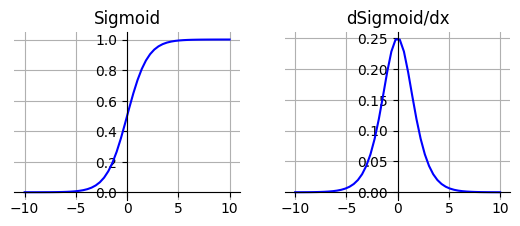

In [18]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10,10)
fig = plt.figure()
# function
y_sigmoid = 1/(1+np.exp(-x))
dy_sigmoid = y_sigmoid * (1 - y_sigmoid)
# draw
ax = fig.add_subplot(221)
ax.plot(x,y_sigmoid,color='blue')
ax.grid()
ax.set_title('Sigmoid')
ax.spines['right'].set_color('none') # 去除右边界线
ax.spines['top'].set_color('none') # 去除上边界线
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
# draw dy
ax = fig.add_subplot(222)
ax.plot(x,dy_sigmoid,color='blue')
ax.grid()
ax.set_title('dSigmoid/dx')
ax.spines['right'].set_color('none') # 去除右边界线
ax.spines['top'].set_color('none') # 去除上边界线
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

***

##### tanh

tanh函数表达式如下

$tanh(x)=\frac{e^x-e^{-x}}{e^x+e^{-x}}$

导数为

$tanh'(x)= 1 - tanh^2(x)$

和Sigmoid的区别：
- 当输入较大或较小时，输出几乎是平滑的并且梯度较小，这不利于权重更新
- tanh 的输出间隔为 1，并且整个函数以 0 为中心，比 sigmoid 函数更好
- 它解决了zero-centered的输出问题，然而梯度消失的问题和幂运算的问题仍然存在。

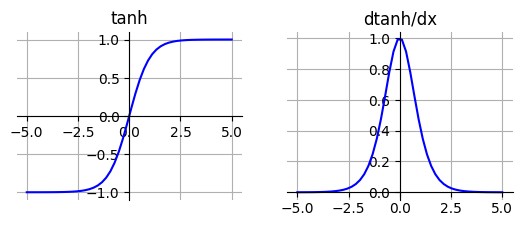

In [21]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5,5)
fig = plt.figure()
# function
y_tanh = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
dy_tanh = 1 - y_tanh * y_tanh
# draw
ax = fig.add_subplot(221)
ax.plot(x,y_tanh,color='blue')
ax.grid()
ax.set_title('tanh')
ax.spines['right'].set_color('none') # 去除右边界线
ax.spines['top'].set_color('none') # 去除上边界线
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
# draw dy
ax = fig.add_subplot(222)
ax.plot(x,dy_tanh,color='blue')
ax.grid()
ax.set_title('dtanh/dx')
ax.spines['right'].set_color('none') # 去除右边界线
ax.spines['top'].set_color('none') # 去除上边界线
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

***

##### ReLU

ReLU全称Rectified Linear Unit，修正线性单元。其函数方程为

$σ(x)=max(0,x)=\begin{cases} x & x \geq 0 \\ 0 & x < 0 \end{cases}$

导数方程为

$σ'(x)=\begin{cases} 1 & x \geq 0 \\ 0 & x < 0 \end{cases}$

优点：
- 解决了梯度消失问题 (在正区间)
- Sigmoid和Tanh激活函数均需要计算指数， 复杂度高， 而ReLU只需要一个阈值即可得到激活值。ReLU 函数中只存在线性关系，因此它的计算速度比 sigmoid 和 tanh 更快
- 收敛速度远快于sigmoid和tanh
- ReLU的非饱和性可以有效地解决梯度消失的问题，提供相对宽的激活边界
- ReLU的单侧抑制提供了网络的稀疏表达能力

缺点：
- ReLU 函数的输出为 0 或正数，不是zero-centered
- 神经元死亡问题

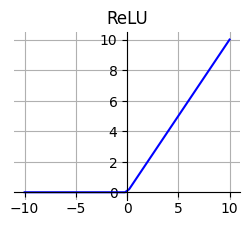

In [22]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10,10)
fig = plt.figure()
# function
y_relu = np.array([0*item if item<0 else item for item in x])
# draw
ax = fig.add_subplot(221)
ax.plot(x,y_relu,color='blue')
ax.grid()
ax.set_title('ReLU')
ax.spines['right'].set_color('none') # 去除右边界线
ax.spines['top'].set_color('none') # 去除上边界线
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

***

##### Leaky ReLU

为了解决ReLU的神经元死亡问题，人们提出了Leaky ReLU。其函数方程为：

$σ(x)=max(αx, x)=\begin{cases} x & x \geq 0 \\ αx & x < 0 \end{cases}$ (α经验值为1/5.5或者0.01)

导数方程为

$σ'(x)=\begin{cases} 1 & x \geq 0 \\ 0 & x < 0 \end{cases}$

相对于ReLU：
- Leaky ReLU 通过把 x 的非常小的线性分量给予负输入（0.01x）来调整负值的零梯度（zero gradients）问题
- leak 有助于扩大 ReLU 函数的范围，通常 a 的值为 0.01 左右
- 解决了神经元死亡问题

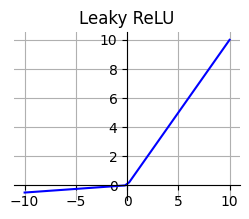

In [29]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10,10)
fig = plt.figure()
# function
y_leakyrelu = np.array([0.05*item if item<0 else item for item in x])
# draw
ax = fig.add_subplot(221)
ax.plot(x,y_leakyrelu,color='blue')
ax.grid()
ax.set_title('Leaky ReLU')
ax.spines['right'].set_color('none') # 去除右边界线
ax.spines['top'].set_color('none') # 去除上边界线
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

***

##### ELU

ELU 的提出也解决了 ReLU 的问题。与 ReLU 相比，ELU 有负值，这会使激活的平均值接近零。均值激活接近于零可以使学习更快，因为它们使梯度更接近自然梯度。

其函数方程为

$f(x)=\begin{cases} x & x > 0 \\ α(e^x-1) & x \leq 0 \end{cases}$

导数方程为

$f(x)=\begin{cases} 1 & x > 0 \\ αe^x & x \leq 0 \end{cases}$

显然，ELU 具有 ReLU 的所有优点，并且：
- 没有 Dead ReLU 问题
- ELU 通过减少偏置偏移的影响，使正常梯度更接近于单位自然梯度，从而使均值向零加速学习
- ELU 在较小的输入下会饱和至负值，从而减少前向传播的变异和信息

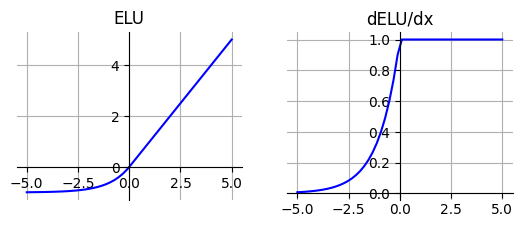

In [34]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5,5)
fig = plt.figure()
# function
y_elu = np.array([np.exp(item)-1 if item<0 else item for item in x])
dy_elu = np.array([np.exp(item) if item<=0 else 1 for item in x])
# draw
ax = fig.add_subplot(221)
ax.plot(x,y_elu,color='blue')
ax.grid()
ax.set_title('ELU')
ax.spines['right'].set_color('none') # 去除右边界线
ax.spines['top'].set_color('none') # 去除上边界线
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
# draw dy
ax = fig.add_subplot(222)
ax.plot(x,dy_elu,color='blue')
ax.grid()
ax.set_title('dELU/dx')
ax.spines['right'].set_color('none') # 去除右边界线
ax.spines['top'].set_color('none') # 去除上边界线
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

*** 

##### Softmax

softmax函数又称归一化指数函数，是基于 sigmoid 二分类函数在多分类任务上的推广；在多分类网络中，常用 Softmax 作为最后一层进行分类。

$Softmax(x_ i)=\frac{e^{x_ i}}{\sum_{j=1}^{n}e^{x_ j}}$

其输出值在0到1之间，且所有输出之和为1。

Softmax 与正常的 max 函数不同：max 函数仅输出最大值，但 Softmax 确保较小的值具有较小的概率，并且不会直接丢弃。我们可以认为它是 argmax 函数的概率版本或「soft」版本。

Softmax 函数的分母结合了原始输出值的所有因子，这意味着 Softmax 函数获得的各种概率彼此相关。

Softmax 激活函数的主要缺点是：
- 在零点不可微
- 负输入的梯度为零，这意味着对于该区域的激活，权重不会在反向传播期间更新，因此会产生永不激活的死亡神经元。

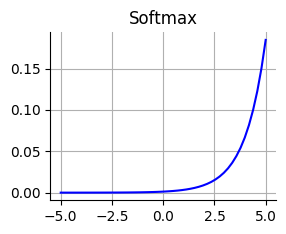

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    exps = np.exp(x - np.max(x))
    return exps / np.sum(exps)

x = np.linspace(-5,5)
fig = plt.figure()
y_softmax = softmax(x)
# draw
ax = fig.add_subplot(221)
ax.plot(x,y_softmax,color='blue')
ax.grid()
ax.set_title('Softmax')
ax.spines['right'].set_color('none') # 去除右边界线
ax.spines['top'].set_color('none') # 去除上边界线

***

#### 本节参考

[详解激活函数（Sigmoid/Tanh/ReLU/Leaky ReLu等）](https://zhuanlan.zhihu.com/p/427541517)

[激活函数（Activation Function）](https://blog.csdn.net/weixin_39910711/article/details/114849349)

***

### 向量化原理

#### 什么是向量化

向量化是将操作应用于整个数组或数据系列的过程，而不是逐个遍历每个元素。在Pandas中可以对整个列或Series执行操作，而无需编写显式循环。这种高效的方法利用了底层优化的库，使您的代码更快、更简洁。

![vect1](./img/vectorization.png)

![vect2](./img/vectorization2.png)

#### 传统的基于循环的处理

利用循环一次迭代一个元素手动求解向量的相关操作。当数据集很大时计算会很慢。

下面使用向量点积做例子。

In [14]:
l1 = [1,2,3,4,5]
l2 = [6,7,8,9,10]

def dotmul(x,y):
    r = 0
    for i in range(len(x)):
        r += x[i] * y[i]
    return r

print(dotmul(l1,l2))

130


#### 向量化处理

我们使用向量化点积运算时，计算机一步将所有数同时执行乘积运算并存放最终结果。因此它更高效更直接，在训练大型数据集与应用数据库时非常有效。

In [15]:
import numpy as np

l1 = np.array([1,2,3,4,5])
l2 = np.array([6,7,8,9,10])

r = np.dot(l1,l2)

print(r)

130


因此普通的运算时顺序的，而向量化运算则是并行地进行向量的运算，推广到张量也是如此。

#### 本节参考

[吴恩达机器学习](https://www.bilibili.com/video/BV1Bq421A74G)

### [Normalization Layers 归一化](https://pytorch.org/docs/stable/nn.html#normalization-layers)

pytorch中的Normalization Layers提供了一些常见的归一化方法。

|类|简介|
|---|---|
|nn.BatchNorm1d|1维BatchNormalizaiton|
|nn.BatchNorm2d|2维BN|
|nn.BatchNorm3d|3维BN|
|nn.LazyBatchNorm1d|延迟初始化1维BN|
|nn.LazyBatchNorm2d|延迟初始化2维BN|
|nn.LazyBatchNorm3d|延迟初始化3维BN|
|nn.GroupNorm|GroupNormalization|
|nn.SyncBatchNorm|N维输入BN|
|nn.InstanceNorm1d|1维InstanceNormalization|
|nn.InstanceNorm2d|2维IN|
|nn.InstanceNorm3d|3维IN|
|nn.LazyInstanceNorm1d|延迟初始化1维IN|
|nn.LazyInstanceNorm2d|延迟初始化2维IN|
|nn.LazyInstanceNorm3d|延迟初始化3维IN|
|nn.LayerNorm|LayerNormalization|
|nn.LocalResponseNorm|local response normalization|

#### 原因

Internal Covariate Shift (ICS)：数据尺度 分布异常，导致训练困难

在Normalization之前，由于数据分布不同，会导致训练时出现类似梯度消失和梯度爆炸的问题。

#### Batch Normalization



## Linear Layers 线性层

pytorch的Linear Layers中提供了函数用来实现一个全连接网络。

|类|简介|
|---|---|
|nn.Identity|对参数不敏感的占位符标识运算符|
|nn.Linear|对输入数据应用一个线性变换|
|nn.Bilinear|对两个不同的输入执行双线性变换|
|nn.LazyLinear|in_feature自动推断的nn.Linear|

### nn.Identity

torch.nn.Identity 类在 PyTorch 中提供了一个占位的恒等操作符，该操作符对传入的参数不敏感。它基本上是一个通过层，不对数据进行任何改变。

torch.nn.Identity 类是一个非常简单但有时非常有用的工具，特别是在需要保持网络结构但又不想改变数据流的情况下。它的存在使得网络架构的调整变得更加灵活和方便。

```python
torch.nn.Identity(*args, **kwargs)
```

#### 功能

* 数据传递: 在网络中，Identity 类用作一个占位符，允许数据无修改地通过。
* 结构保持: 在修改或调试网络结构时，可以临时替换其他层，而不改变输入和输出的形状。
* 参数灵活性: 该类可以接受任意参数 (*args, **kwargs)，但这些参数不会被使用。

In [3]:
import torch

n = torch.nn.Identity(input)

input = torch.rand(5,5)
output = n(input)

print(input)
print(output)

tensor([[0.7642, 0.3127, 0.8873, 0.3162, 0.4151],
        [0.4976, 0.6038, 0.2184, 0.2895, 0.9472],
        [0.1230, 0.4618, 0.9067, 0.2337, 0.1460],
        [0.8237, 0.9152, 0.4652, 0.7327, 0.1707],
        [0.3529, 0.8750, 0.3639, 0.3585, 0.9799]])
tensor([[0.7642, 0.3127, 0.8873, 0.3162, 0.4151],
        [0.4976, 0.6038, 0.2184, 0.2895, 0.9472],
        [0.1230, 0.4618, 0.9067, 0.2337, 0.1460],
        [0.8237, 0.9152, 0.4652, 0.7327, 0.1707],
        [0.3529, 0.8750, 0.3639, 0.3585, 0.9799]])


### nn.Linear

torch.nn.Linear 类在 PyTorch 中实现了一个全连接层，也被称为线性层或密集层。它对输入数据应用一个线性变换。

```python
torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)
```

**Parameters**

* in_features   - 每个输入样本的大小
* out_features  - 每个输出样本的大小
* bias          - 如果设置为 False，则层不会学习附加的偏置

#### 功能

* 线性变换: 对输入数据应用线性变换$y=xA^{T}+b$
* 适用于多种网络架构: 作为神经网络中最基本的组件之一，用于构建各种复杂网络结构

In [4]:
import torch

n = torch.nn.Linear(5,6)

input = torch.ones(5,5)
output = n(input)
print(input)
print(output)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
tensor([[ 0.2881, -0.6615,  0.1529, -0.1438,  1.8038, -1.1995],
        [ 0.2881, -0.6615,  0.1529, -0.1438,  1.8038, -1.1995],
        [ 0.2881, -0.6615,  0.1529, -0.1438,  1.8038, -1.1995],
        [ 0.2881, -0.6615,  0.1529, -0.1438,  1.8038, -1.1995],
        [ 0.2881, -0.6615,  0.1529, -0.1438,  1.8038, -1.1995]],
       grad_fn=<AddmmBackward0>)


### nn.Bilinear

torch.nn.Bilinear 类在 PyTorch 中实现了一个双线性变换层。这个层对两个不同的输入执行双线性变换，这种变换涉及到两个输入的元素乘积。

```python
torch.nn.Bilinear(in1_features, in2_features, out_features, bias=True, device=None, dtype=None)
```

**Parameters**

* in1_features  - 第一个输入样本的特征大小
* in2_features  - 第二个输入样本的特征大小
* out_features  - 输出样本的特征大小
* bias          - 如果设置为 False，则层不会学习附加偏置

#### 功能

* 双线性变换: 对两个输入数据$x_{1}$和$x_{2}$应用双线性变换$y=x_{1}^{T}Ax_{2}+b$
* 应用场景: 在某些场景下，双线性变换能够有效地建模两个不同输入之间的复杂关系，如在推荐系统、关系建模等领域

In [6]:
import torch

n = torch.nn.Bilinear(5,5,6)

input1 = torch.ones(5,5)
input2 = torch.ones(5,5) * 2

output = n(input1,input2)

print(input1)
print(input2)
print(output)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
tensor([[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]])
tensor([[ 0.3489, -1.8523, -4.2550, -3.8144,  0.7080, -2.0243],
        [ 0.3489, -1.8523, -4.2550, -3.8144,  0.7080, -2.0243],
        [ 0.3489, -1.8523, -4.2550, -3.8144,  0.7080, -2.0243],
        [ 0.3489, -1.8523, -4.2550, -3.8144,  0.7080, -2.0243],
        [ 0.3489, -1.8523, -4.2550, -3.8144,  0.7080, -2.0243]],
       grad_fn=<AddBackward0>)


### nn.LazyLinear

torch.nn.LazyLinear 类在 PyTorch 中提供了一种“懒加载”版本的线性层（Linear）。在这个模块中，in_features（输入特征的数量）是从第一次执行前向传播时输入数据的形状推断出来的。

#### 功能

* 自动推断 in_features: 这个类允许用户在初始化时不指定输入特征的大小（in_features），该值会在模块第一次前向传播时自动推断
* 延迟初始化: 权重和偏置参数在第一次前向传播时才被初始化，之前它们是未初始化的
* 转换为常规 Linear 层: 一旦完成第一次前向传播，LazyLinear 模块就会变成常规的 torch.nn.Linear 模块

### 本节参考

[简单易懂的PyTorch线性层解析：神经网络的构建基石](https://blog.csdn.net/qq_42452134/article/details/135404301)